In [65]:
# setting
plt.rcParams['font.family']= 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams["figure.dpi"] = 200

In [68]:
# Supplementary Fig. 1a
file_path1 = "../data/ChIP-seq/ChIP_H3K4me123_WT.rpkm.tsv"
df_chip1 = pd.read_csv(file_path1, sep="\t", index_col=0)

file_path2 = "../data/ChIP-seq/ChIP_H3K4me2_H2A.Z_H2Aub_H3K27me3_WT.rpkm.tsv"
df_chip2 = pd.read_csv(file_path2, sep="\t", index_col=0)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


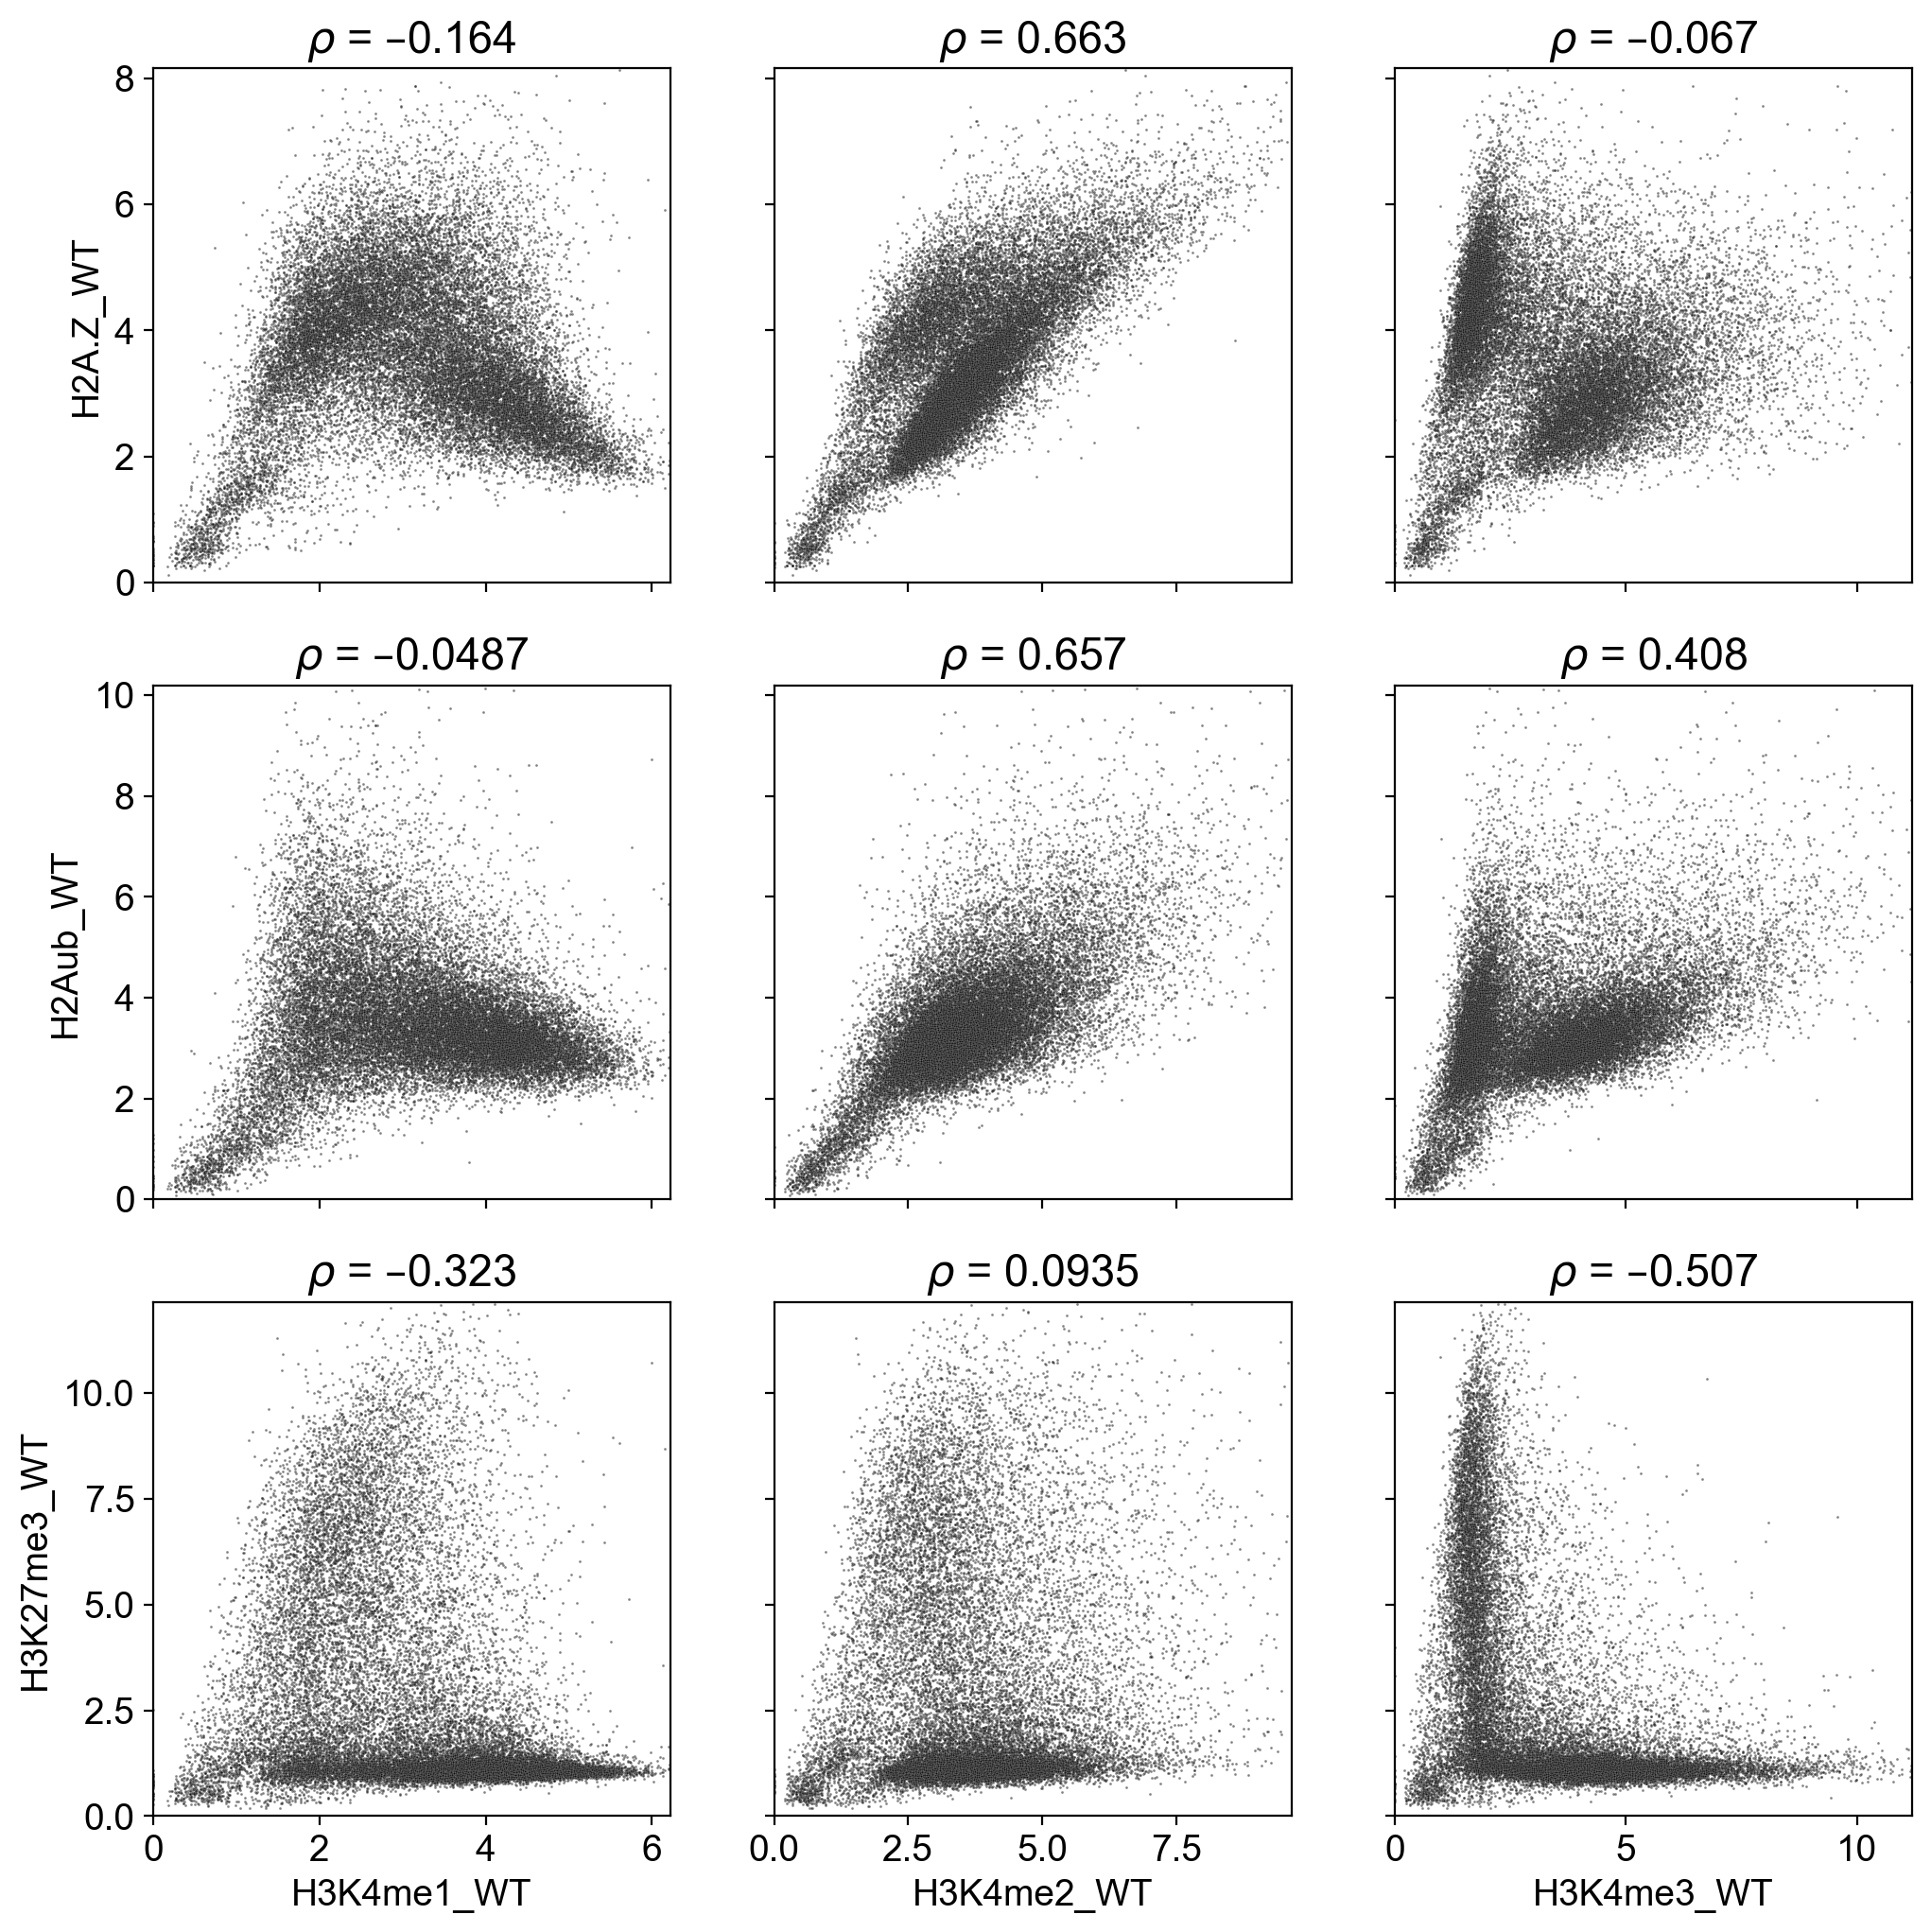

In [64]:
hm_list1 = ["H2A.Z","H2Aub","H3K27me3"]
hm_list2 = ["H3K4me1","H3K4me2","H3K4me3"]

fig,ax = plt.subplots(3,3,figsize=(12,12),sharex="col",sharey="row")
for i,hm1 in enumerate(hm_list1):
    for j,hm2 in enumerate(hm_list2):
        x = np.sqrt(df_chip1[f"{hm2}_WT"])
        y = np.sqrt(df_chip2[f"{hm1}_WT"])

        # plot
        sns.scatterplot(x=x,y=y,s=1,alpha=0.5,c="k",ax=ax[i][j])

        # fomat figures
        ax[i][j].set_xlim(0,np.percentile(x,99.9))
        ax[i][j].set_ylim(0,np.percentile(y,99.9))

        # Spearman's R
        r,p = spearmanr(x,y)
        if r<0:
            ax[i][j].set_title("$\it{ρ}$"+f" = –{r*(-1):4.3}")
        else:
            ax[i][j].set_title("$\it{ρ}$"+f" = {r:4.3}")

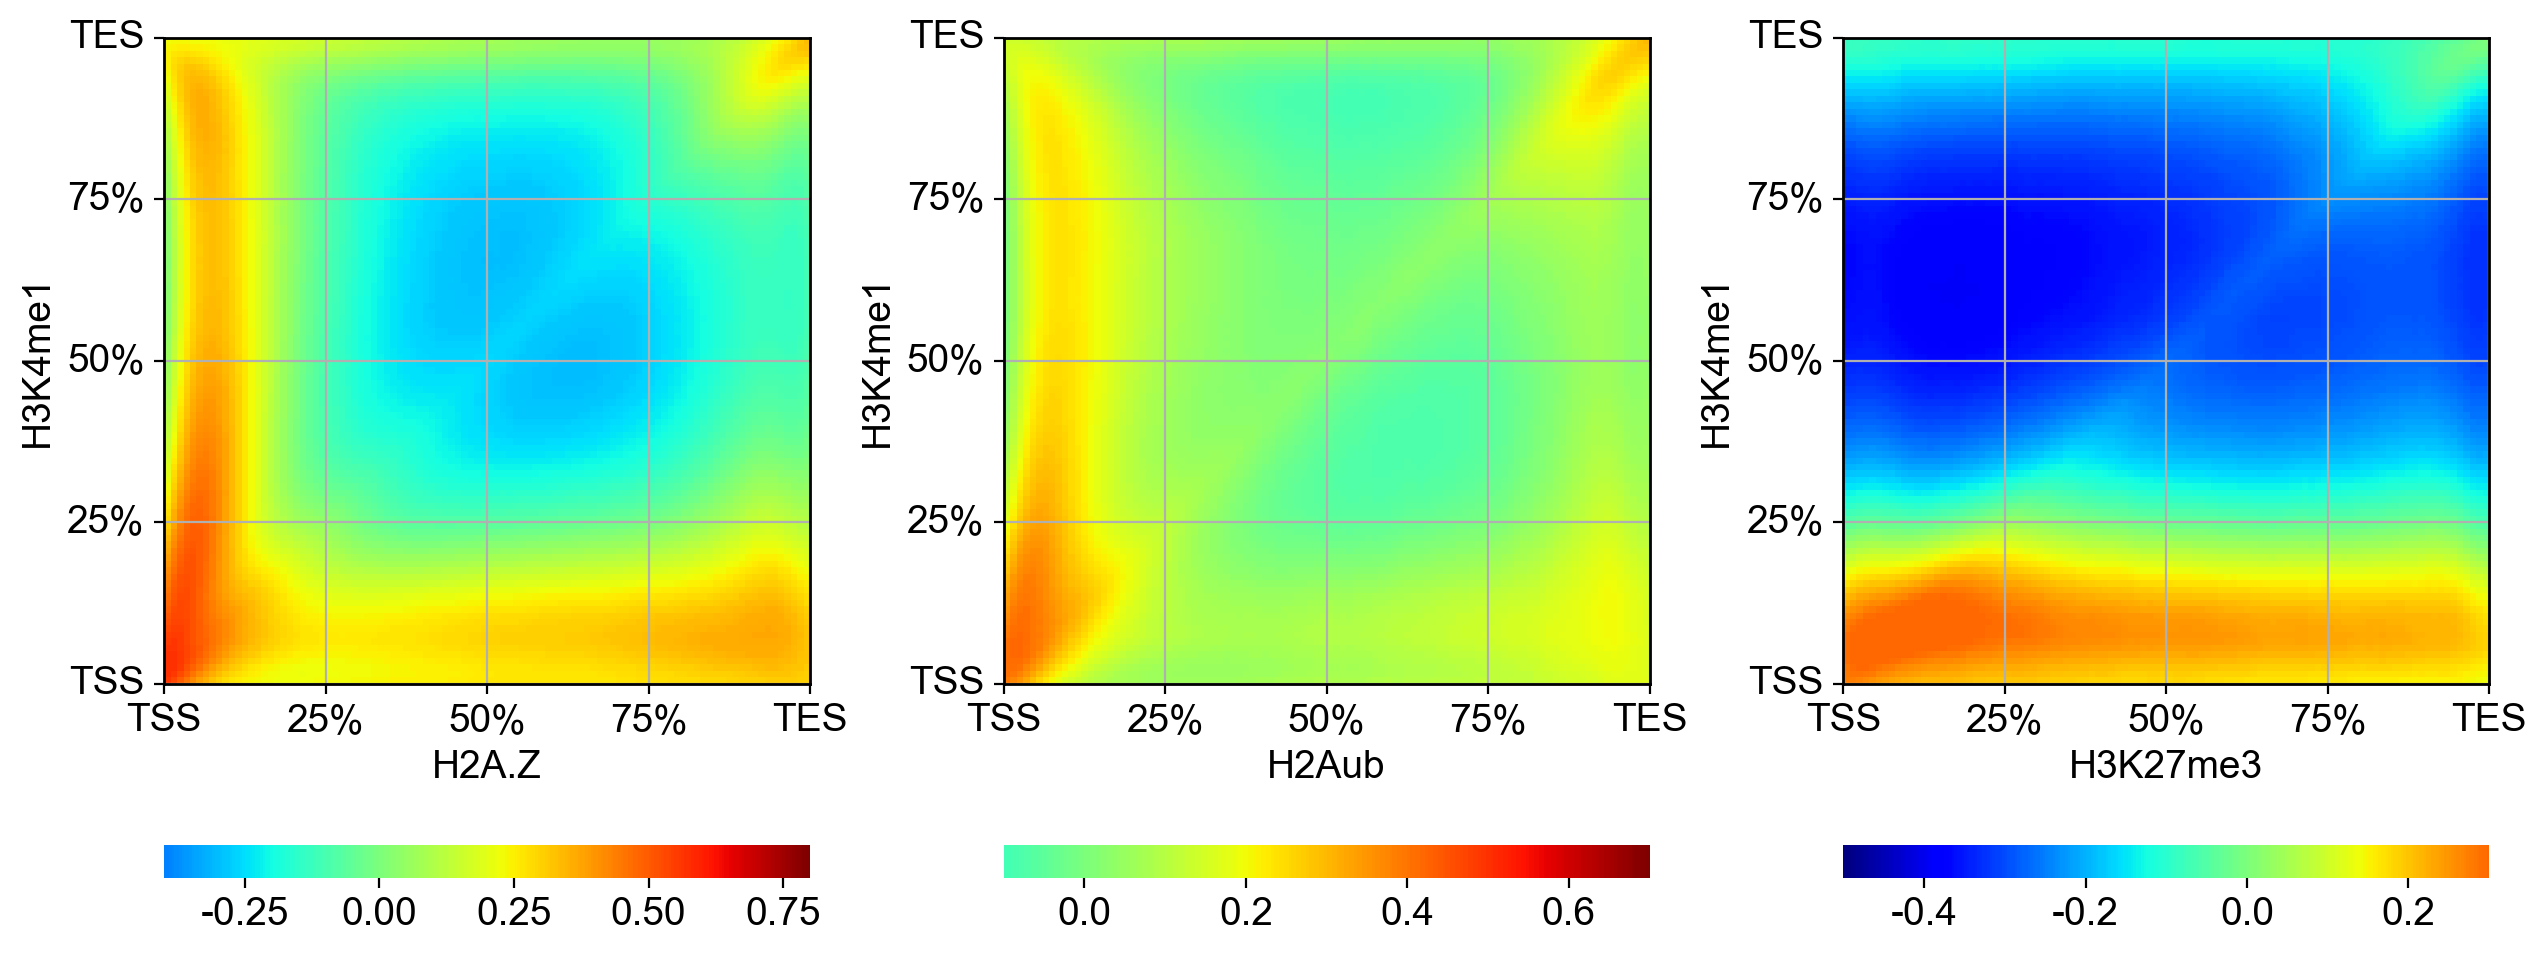

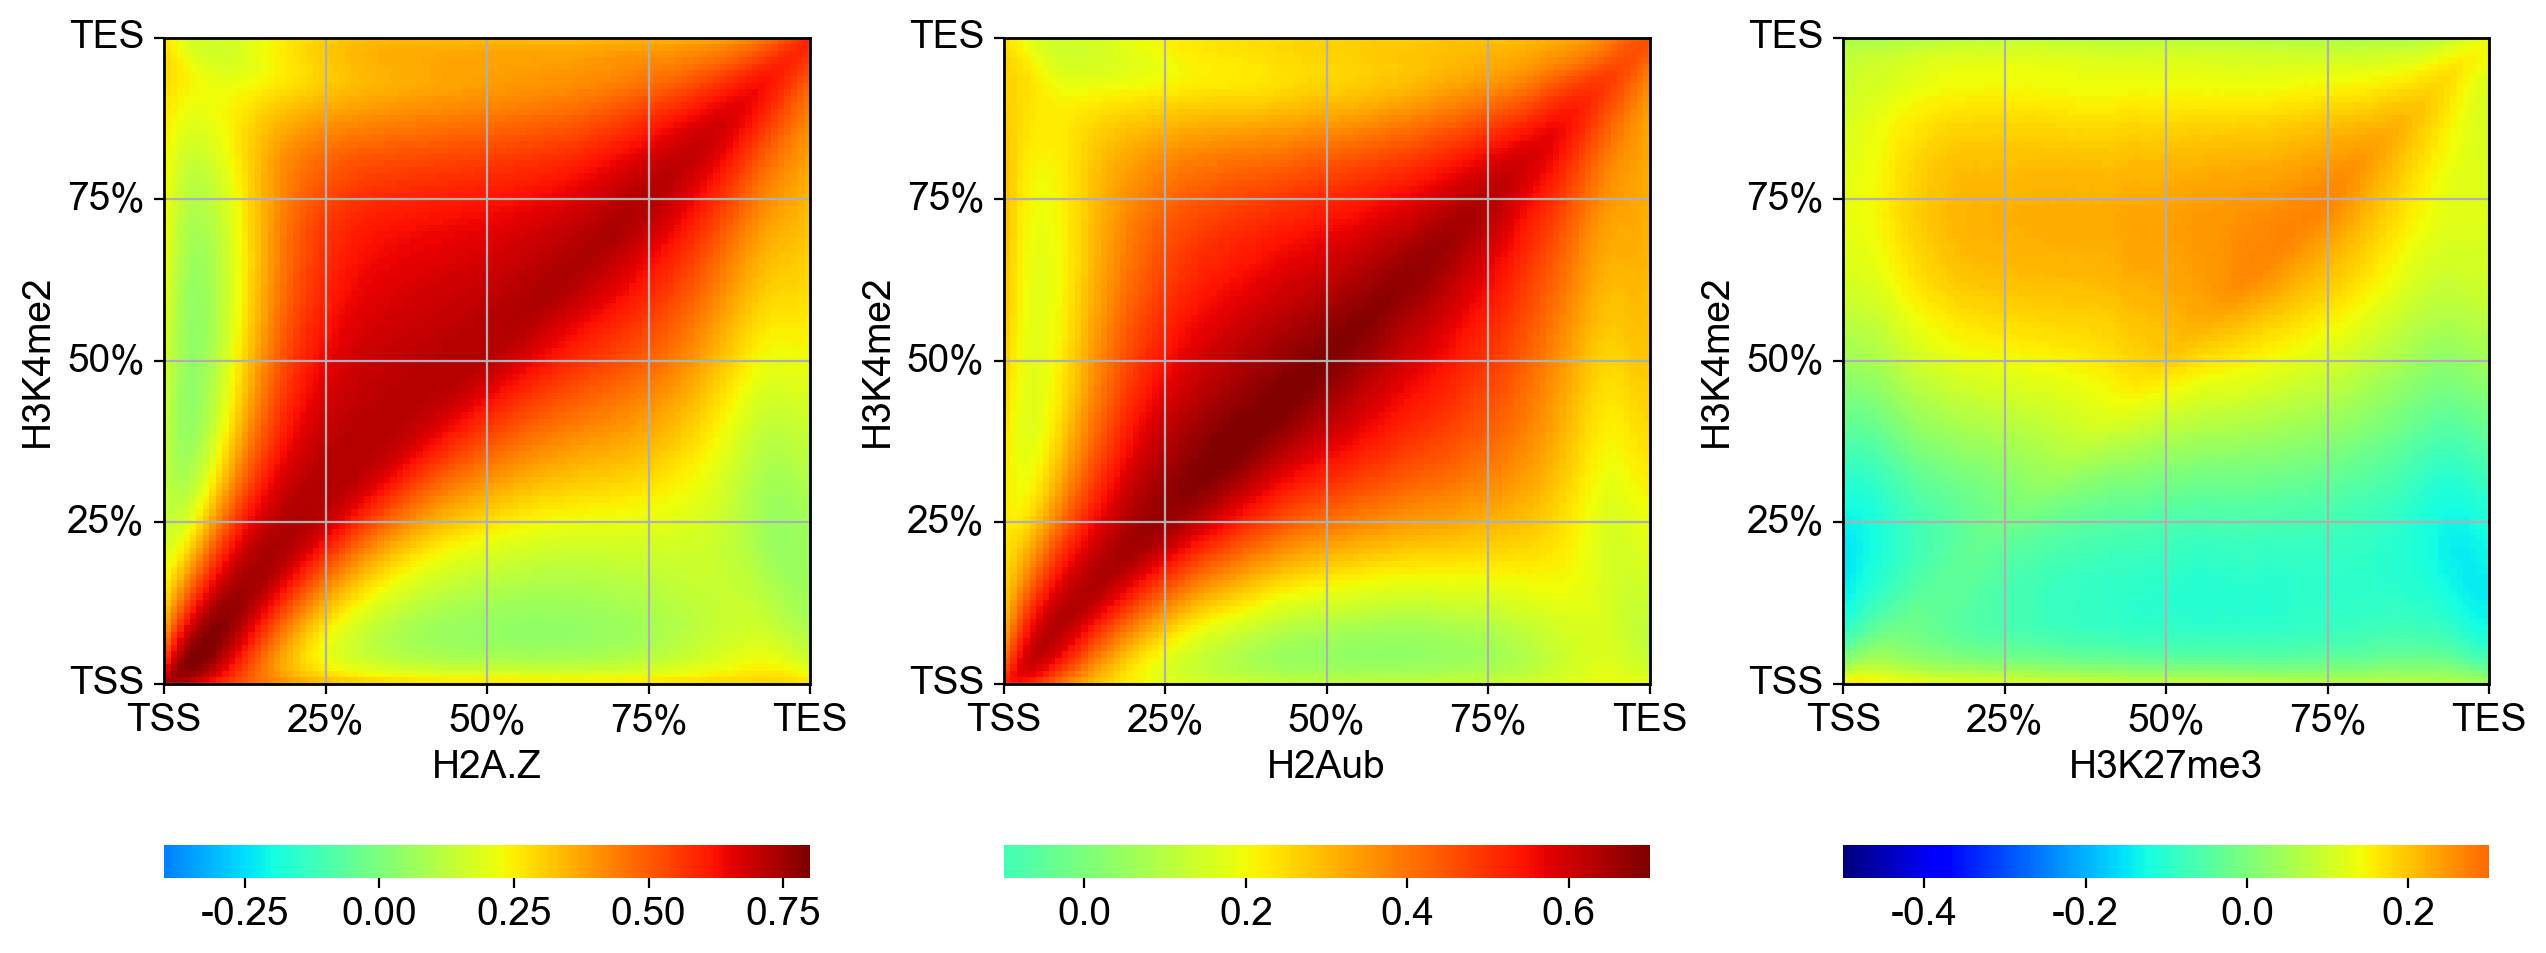

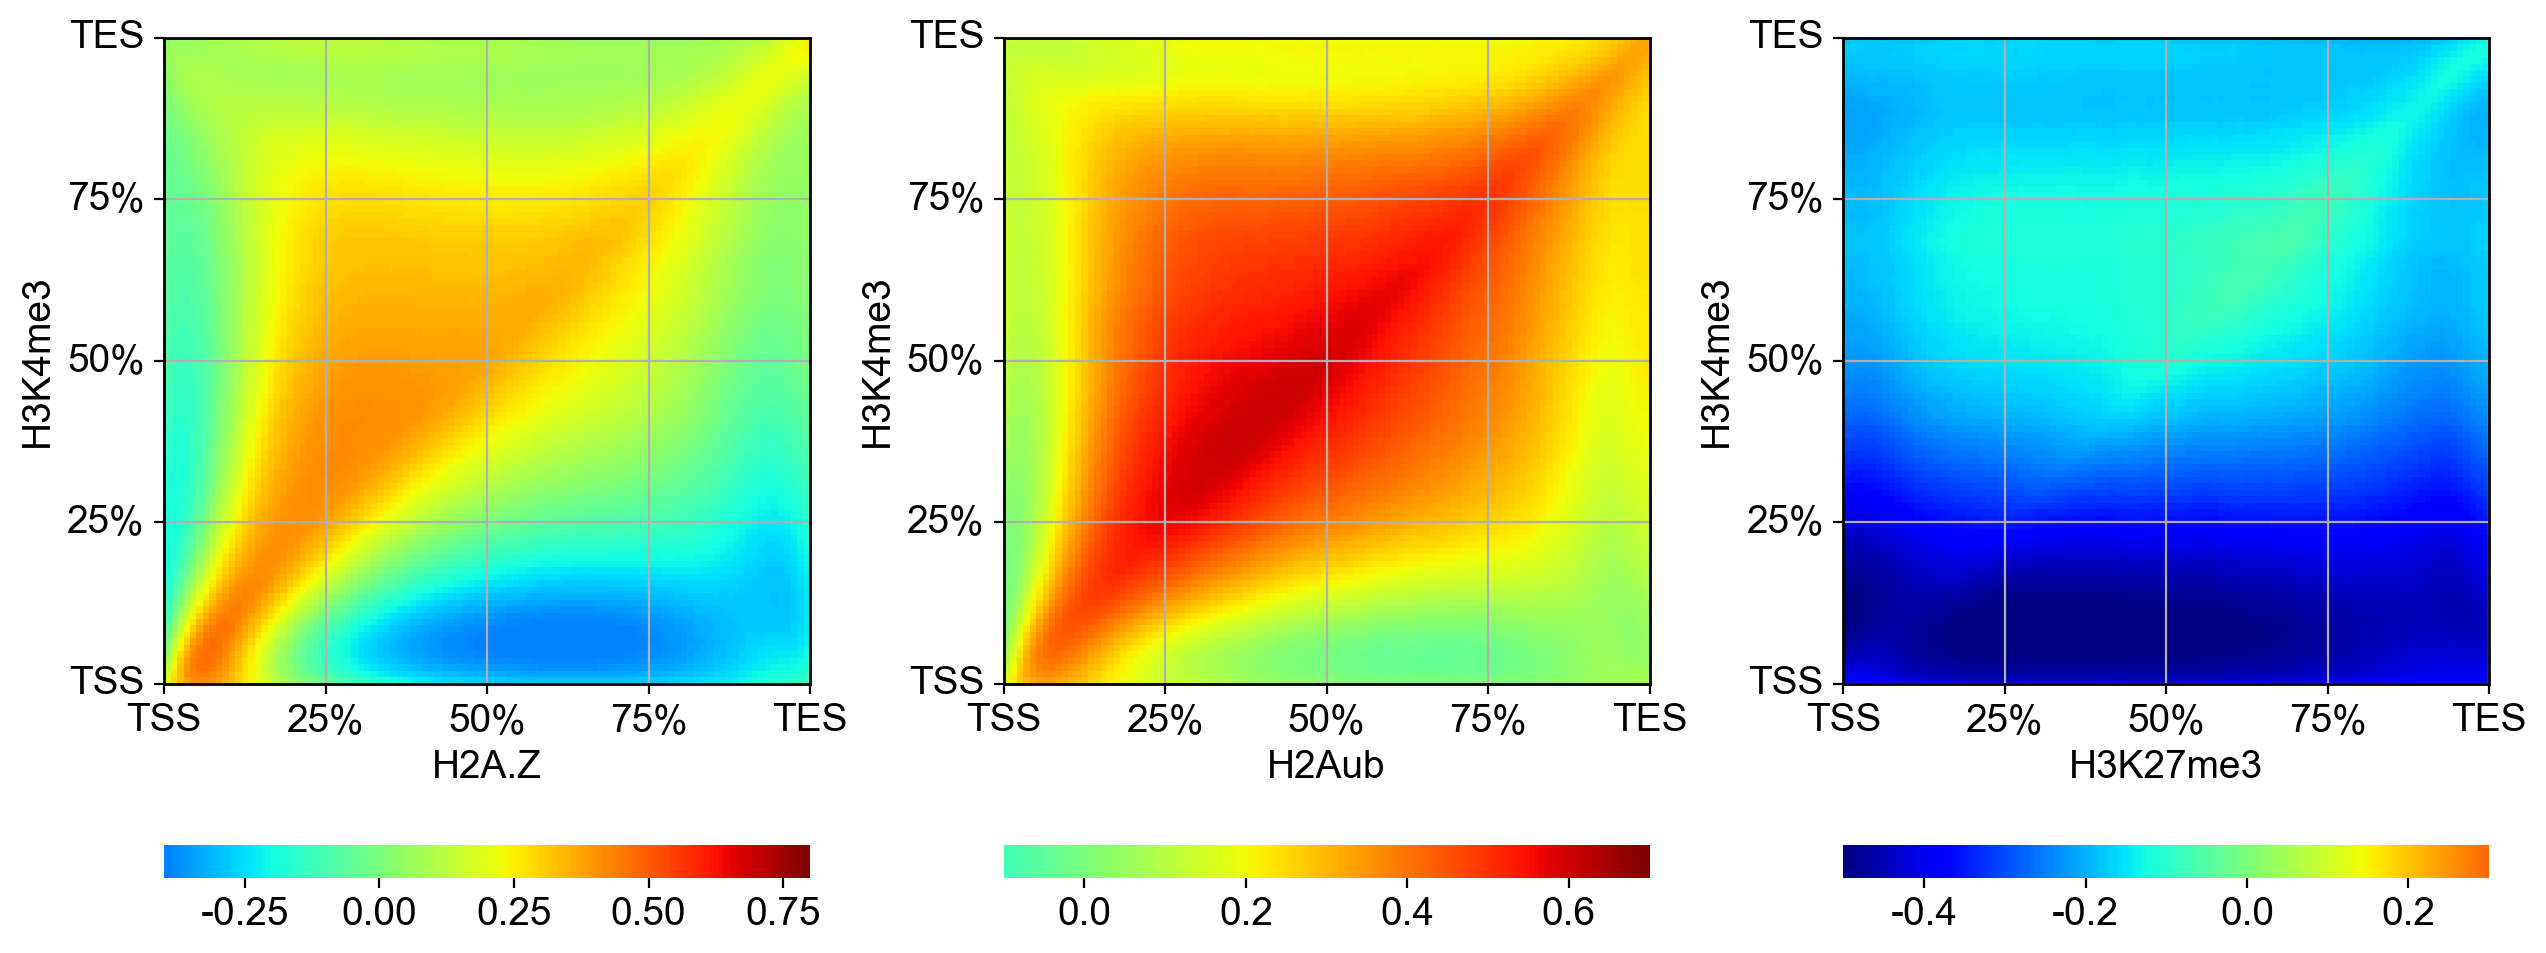

In [74]:
# Supplementary Fig. 1b
hm1_list = ["H3K4me1","H3K4me2","H3K4me3"]
hm2_list = ["H2A.Z","H2Aub","H3K27me3",]
vmax_list = [0.8,0.7,0.3]
vmin_list = [-0.4,-0.1,-0.5]

for hm1 in hm1_list:
    fig,ax = plt.subplots(1,3,figsize=(15,7),dpi=200,
                      gridspec_kw=dict(wspace=0.3))
    for i in range(3):
        hm2 = hm2_list[i]
        df_r = pd.read_csv(f"../data/FigS1b_spearmanr_per_bins_{hm1}_{hm2}.csv",
                           header=None)
        df_r = df_r.iloc[::-1,:]

        # plot
        sns.heatmap(df_r,cmap="jet",ax=ax[i],center=0,vmax=vmax_list[i],vmin=vmin_list[i],
                    cbar=True,cbar_kws={"orientation":"horizontal"})

        # format figure
        ax[i].set_xlabel(hm2)
        ax[i].set_ylabel(hm1)
        ax[i].set_aspect('equal', adjustable='box')
        ax[i].set_xticks(np.arange(0,101,25))
        ax[i].set_yticks(np.arange(0,101,25))
        ax[i].set_xticklabels(["TSS","25%","50%","75%","TES"],rotation=0)
        ax[i].set_yticklabels(["TES","75%","50%","25%","TSS"],rotation=0)
        ax[i].grid()
        for spine in ax[i].spines.values():
            spine.set_visible(True)
            spine.set_linewidth(1)

In [75]:
# Supplementary Fig. 1c
file_path = "../data/ChIP-seq/ChIP_H3K4me123_WT.rpkm.tsv"
df_chip = pd.read_csv(file_path, sep="\t", index_col=0)

17480
6752
252
2959


(0.0, 10.0)

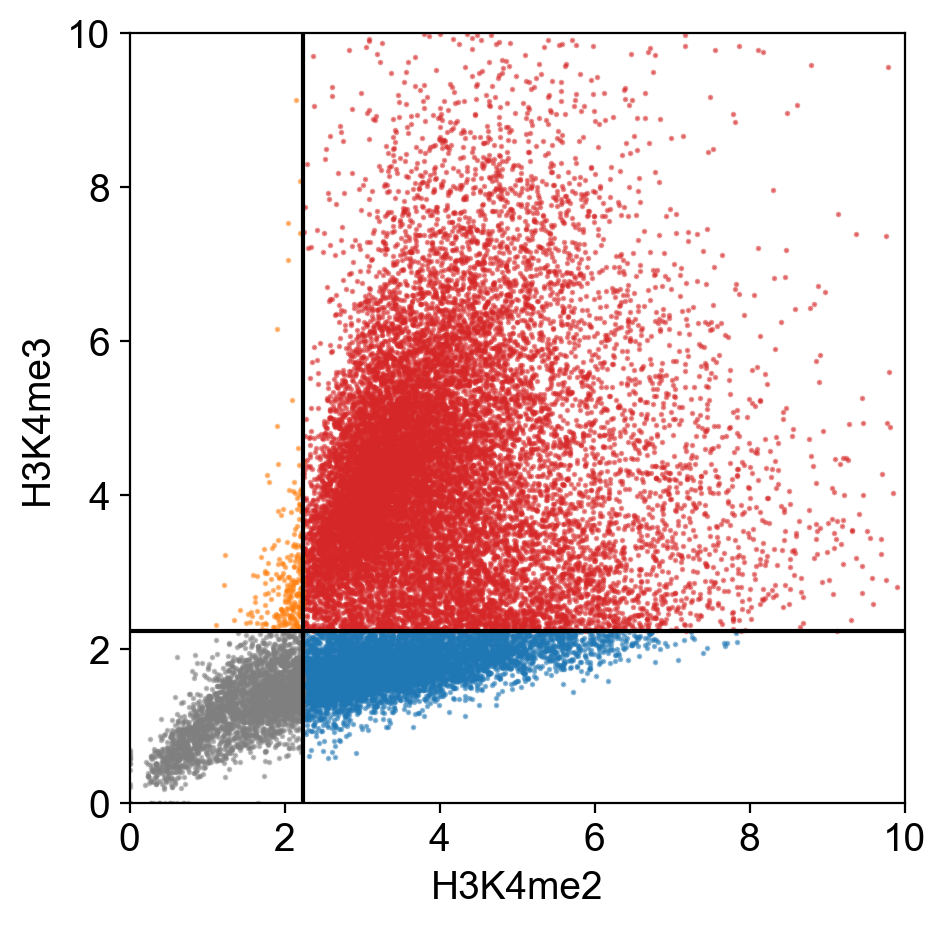

In [78]:
x = np.sqrt(df_chip["H3K4me2_WT"])
y = np.sqrt(df_chip["H3K4me3_WT"])

threshold = 5
mask1 = (df_chip["H3K4me2_WT"]>threshold)&(df_chip["H3K4me3_WT"]>threshold) # Group 1
mask2 = (df_chip["H3K4me2_WT"]>threshold)&(df_chip["H3K4me3_WT"]<=threshold) # Group 2
mask3 = (df_chip["H3K4me2_WT"]<=threshold)&(df_chip["H3K4me3_WT"]>threshold) # Group 3
mask4 = (df_chip["H3K4me2_WT"]<=threshold)&(df_chip["H3K4me3_WT"]<=threshold) # Group 4
mask_list = [mask1,mask2,mask3,mask4]
c_list = ["tab:red","tab:blue","tab:orange","tab:grey"]

# plot
plt.figure(figsize=(5,5),dpi=200)
for c,mask in zip(c_list,mask_list):
    print(mask.sum())
    plt.scatter(x[mask],y[mask],s=1,alpha=0.5,c=c)

# format figrue
plt.vlines(np.sqrt(5),0,10,color="k")
plt.hlines(np.sqrt(5),0,10,color="k")
plt.xlabel("H3K4me2")
plt.ylabel("H3K4me3")
plt.xlim(0,10)
plt.ylim(0,10)